In [ ]:
### WARIANT ZADANIA 2

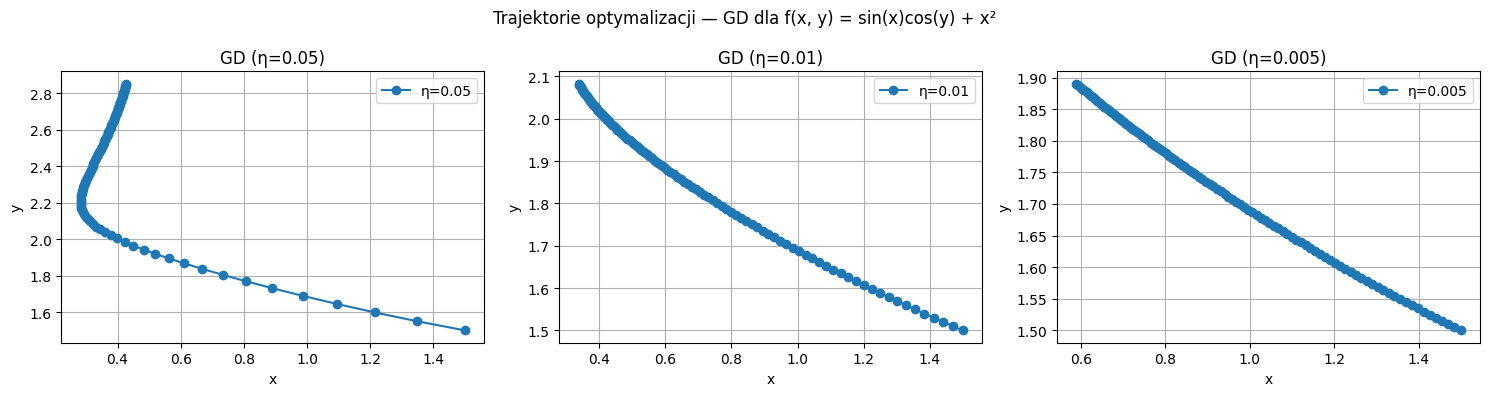

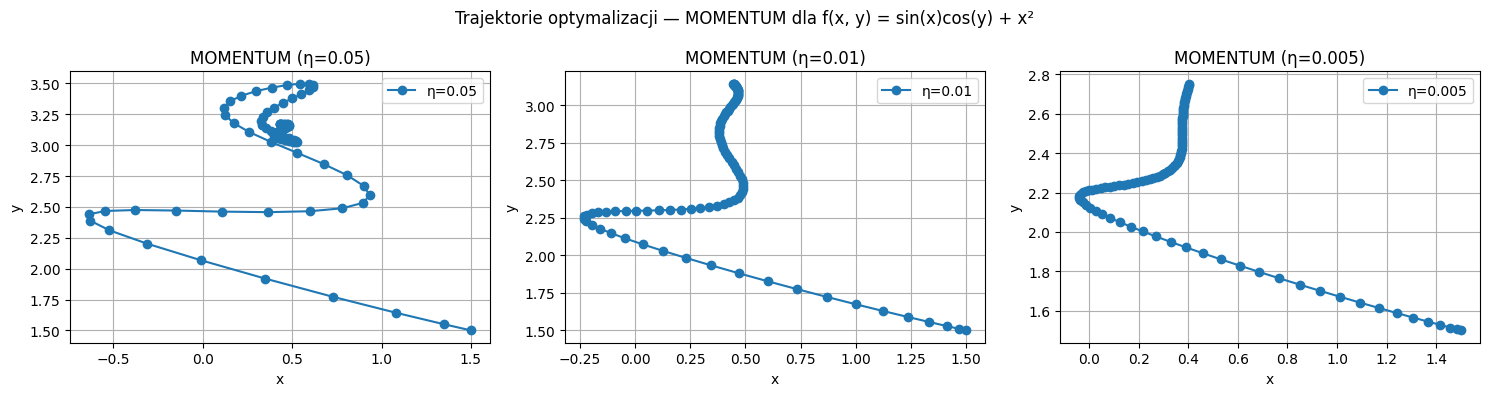

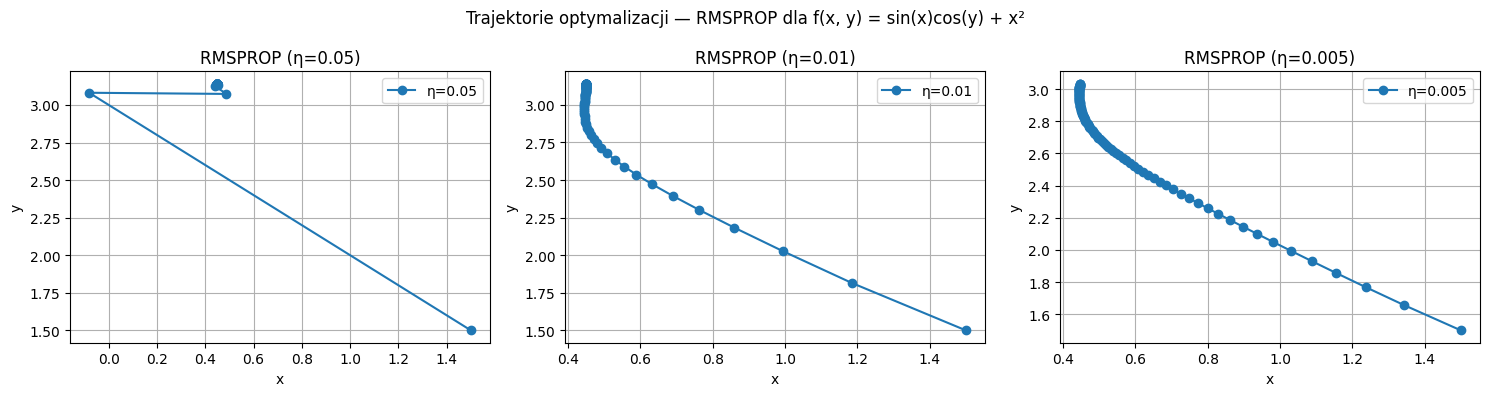

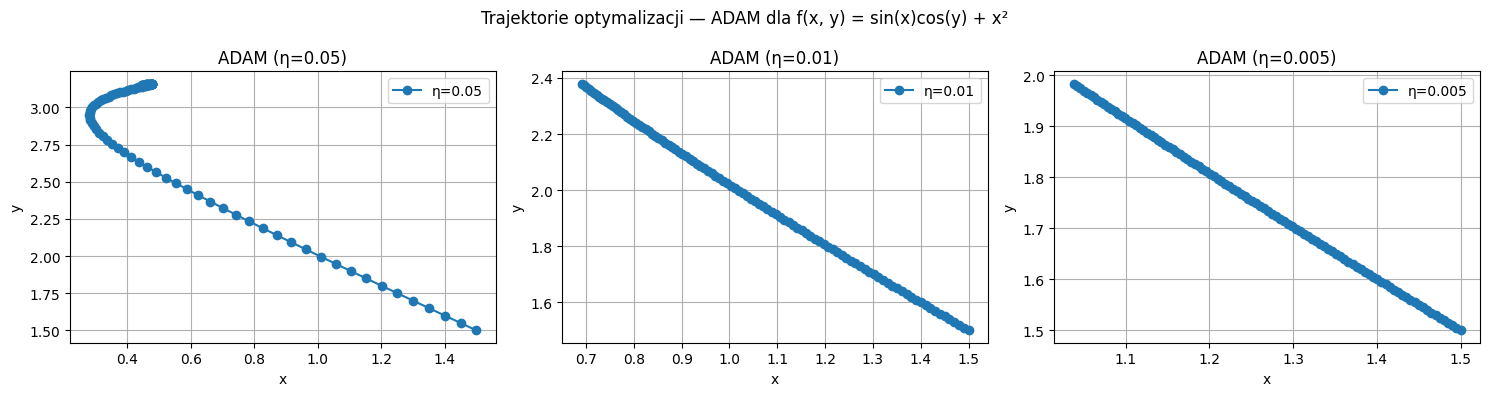

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu i jej gradient
def f_variant2(x, y):
    return np.sin(x) * np.cos(y) + x**2

def grad_f_variant2(x, y):
    df_dx = np.cos(x) * np.cos(y) + 2 * x
    df_dy = -np.sin(x) * np.sin(y)
    return np.array([df_dx, df_dy])

# Funkcja optymalizująca
def optimize_path_variant2(opt_name, lr=0.01, steps=100):
    pos = np.array([1.5, 1.5])  # punkt startowy
    path = [pos.copy()]
    v, s = np.zeros(2), np.zeros(2)
    beta1, beta2 = 0.9, 0.999
    eps = 1e-8

    for t in range(1, steps + 1):
        grad = grad_f_variant2(*pos)

        if opt_name == 'gd':
            pos -= lr * grad
        elif opt_name == 'momentum':
            v = beta1 * v + lr * grad
            pos -= v
        elif opt_name == 'rmsprop':
            s = beta2 * s + (1 - beta2) * grad**2
            pos -= lr / (np.sqrt(s) + eps) * grad
        elif opt_name == 'adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            pos -= lr * v_corr / (np.sqrt(s_corr) + eps)

        path.append(pos.copy())

    return np.array(path)

# Parametry eksperymentu
learning_rates = [0.05, 0.01, 0.005]
optimizers = ['gd', 'momentum', 'rmsprop', 'adam']

# Zbieranie trajektorii
results = {
    opt: {
        lr: optimize_path_variant2(opt, lr=lr, steps=100)
        for lr in learning_rates
    }
    for opt in optimizers
}

# Wizualizacja trajektorii
for opt in results:
    plt.figure(figsize=(15, 4))
    for i, lr in enumerate(learning_rates, 1):
        path = results[opt][lr]
        plt.subplot(1, 3, i)
        plt.plot(path[:, 0], path[:, 1], marker='o', label=f'η={lr}')
        plt.title(f"{opt.upper()} (η={lr})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()
    plt.suptitle(f"Trajektorie optymalizacji — {opt.upper()} dla f(x, y) = sin(x)cos(y) + x²")
    plt.tight_layout()
    plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja i spłaszczenie obrazów
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Model MLP
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Konfiguracja TensorBoard
log_dir = f"logs/fashion_mnist_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Trening modelu z rejestrowaniem do TensorBoard
model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)





Epoch 1/5


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5004 - accuracy: 0.8211 - val_loss: 0.4486 - val_accuracy: 0.8348
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8632 - val_loss: 0.3911 - val_accuracy: 0.8574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8777 - val_loss: 0.4368 - val_accuracy: 0.8461
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8848 - val_loss: 0.3511 - val_accuracy: 0.8707
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8920 - val_loss: 0.3458 - val_accuracy: 0.8760
